In [1]:
import pandas as pd
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import mapclassify as mc
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from shapely.geometry import MultiPoint, Point

# Alternative_Model_Africa

C:\Users\user\.conda\envs\stat\lib\site-packages\geopandas\geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


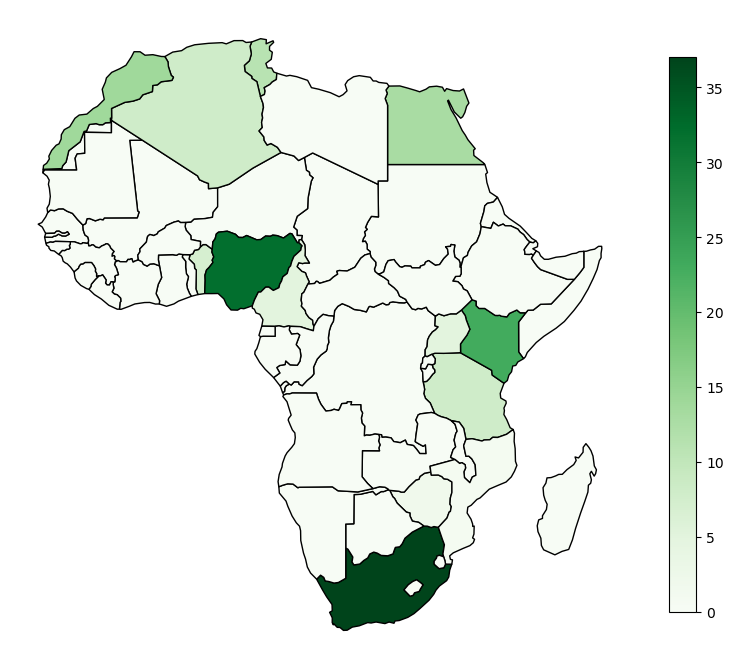

In [3]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
Africa = (world[world['continent'] ==  'Africa'])
gdf1 = gpd.GeoDataFrame(pd.read_csv('GPS_1.csv', encoding='latin-1'), geometry=gpd.points_from_xy(pd.read_csv('GPS_1.csv', encoding='latin-1').Long, pd.read_csv('GPS_1.csv', encoding='latin-1').Lat))
Africa['Number of Articles'] = ['8','0','0','0','23','0','0','37','0','2','0','0','0','0','0','7','0','32','5','0','0','0','0','0','0','0','0','0','0','0','0','0','0','1','0','0','0','0','0','11','8','0','14','13','0','0','0','0','5','0','0']
Africa['Number of Articles']=Africa['Number of Articles'].apply(int)
ax = Africa.plot(column='Number of Articles', cmap='Greens',
            edgecolor='k',figsize=(14, 8), legend=True,legend_kwds={'shrink': 0.6})
fig = plt.gcf()
ax.set_axis_off();
fig.set_size_inches(10, 12)
plt.savefig('Fig 1C.JPG', dpi=300)

In [4]:
df1 = pd.read_csv('DROSO.csv', encoding='latin-1')
Count1 = pd.crosstab(index=df1['Country'], columns='counts')
Count1['percent'] = (Count1['counts'] / Count1['counts'].sum()) * 100
Count1

col_0,counts,percent
Country,,
Algeria,8,4.761905
Benin,7,4.166667
Cameroon,5,2.976190
Egypt,13,7.738095
Kenya,23,13.690476
Mauritius,2,1.190476
Morocco,14,8.333333
Mozambique,1,0.595238
Nigeria,32,19.047619


In [6]:
df1 = pd.read_csv('DROSO.csv', encoding='latin-1')
Countf = pd.crosstab(index=df1['Model'], columns='counts')
Countf['percent'] = (Countf['counts'] / Countf['counts'].sum()) * 100
Countf

col_0,counts,percent
Model,,
C. elegans,23,13.690476
Fruit flies,131,77.976190
Zebrafish,14,8.333333


In [ ]:
[South","Africa","Nigeria","Kenya","Morocco","Egypt","Tunisia","Algeria","Tanzania","Benin","Cameroon","Uganda","Mauritius","Zimbabwe","Mozambique]

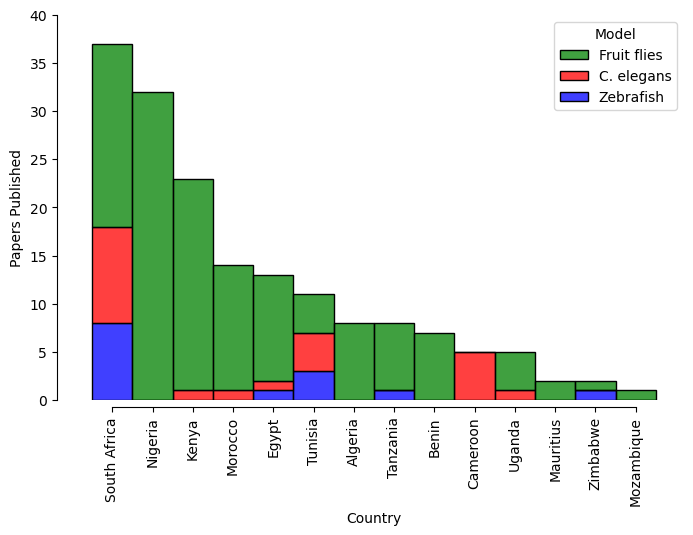

In [16]:
df1['Country'] = pd.Categorical(df1['Country'],["South Africa","Nigeria","Kenya","Morocco","Egypt","Tunisia","Algeria","Tanzania","Benin","Cameroon","Uganda","Mauritius","Zimbabwe","Mozambique"])
plt.ylim(0, 40)
sns.histplot(x="Country",
             hue="Model", palette=["g","r","b"], multiple="stack",
            data=df1),
sns.despine(offset=5, trim=True)
plt.xticks(rotation=90)
plt.ylabel('Papers Published')
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.savefig('Fig 2b.JPG', bbox_inches = 'tight', dpi=300)

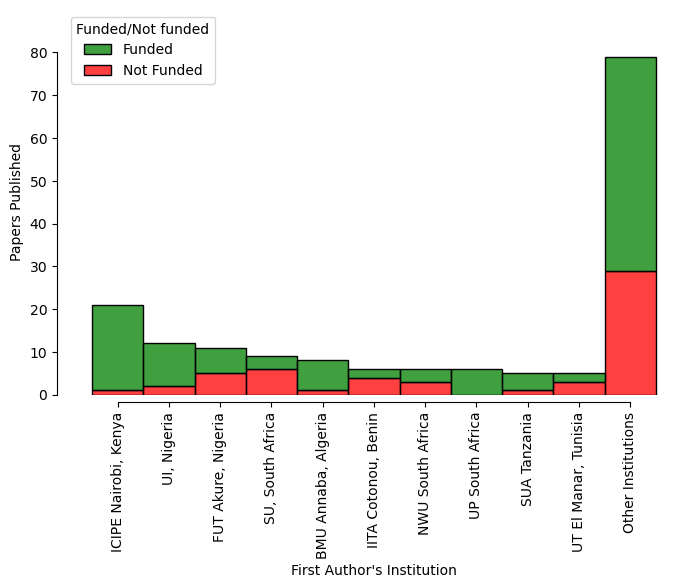

In [17]:
df1["First Author's Institution"] = pd.Categorical(df1["First Author's Institution"],["ICIPE Nairobi, Kenya",
"UI, Nigeria",
"FUT Akure, Nigeria",
"SU, South Africa",
"BMU Annaba, Algeria",
"IITA Cotonou, Benin",
"NWU South Africa",
"UP South Africa",
"SUA Tanzania",
"UT El Manar, Tunisia",
"Other Institutions"])
df1['Funded/Not funded'] = df1['Funded/Not funded'].replace({1: 'Funded', 0: 'Not Funded'})
df1['Funded/Not funded']= df1['Funded/Not funded'].apply(str)
sns.histplot(x="First Author's Institution",
             hue="Funded/Not funded", palette=["g","r"], multiple="stack",
            data=df1),
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=5, trim=True)
plt.xticks(rotation=90)
plt.ylabel('Papers Published')
plt.ylim(0, 90)
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.savefig('Fig 1D.JPG', bbox_inches = 'tight', dpi=300)

In [ ]:
pd.crosstab(foo, bar)

In [ ]:
"ICIPE Nairobi, Kenya",
"UI, Nigeria",
"FUT Akure, Nigeria",
"SU, South Africa",
"BMU Annaba, Algeria",
"IITA Cotonou, Benin",
"NWU South Africa",
"UP South Africa",
"SUA Tanzania",
"UT El Manar, Tunisia",
"Others"




In [18]:
CountA = pd.crosstab(index=df1["First Author's Institution"], columns='counts')
CountA['percent'] = (CountA['counts'] / CountA['counts'].sum()) * 100
CountA

col_0,counts,percent
First Author's Institution,,
"ICIPE Nairobi, Kenya",21,12.500000
"UI, Nigeria",12,7.142857
"FUT Akure, Nigeria",11,6.547619
"SU, South Africa",9,5.357143
"BMU Annaba, Algeria",8,4.761905
"IITA Cotonou, Benin",6,3.571429
NWU South Africa,6,3.571429
UP South Africa,6,3.571429
SUA Tanzania,5,2.976190


In [19]:
CountAa = pd.crosstab(index=df1["Region"], columns='counts')
CountAa['percent'] = (CountAa['counts'] / CountAa['counts'].sum()) * 100
CountAa

col_0,counts,percent
Region,,
North Africa,46,27.380952
East Africa,39,23.214286
Southaern Africa,39,23.214286
West Africa,39,23.214286
Central Africa,5,2.976190


(0.0, 45.0)

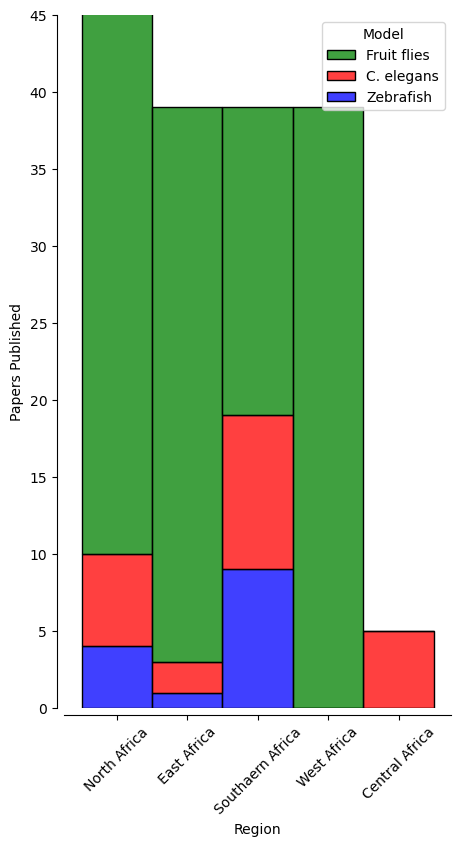

In [20]:
df1["Region"] = pd.Categorical(df1["Region"],["North Africa",
"East Africa",
"Southaern Africa",
"West Africa",
"Central Africa"])
sns.histplot(x="Region",
             hue="Model", palette=["g","r","b"], multiple="stack",
            data=df1),
sns.despine(offset=5, trim=False)
plt.xticks(rotation=45)
fig = plt.gcf()
plt.ylabel('Papers Published')
fig.set_size_inches(5, 9)
plt.savefig('Fig 2A.JPG', bbox_inches = 'tight', dpi=300)
plt.ylim(0, 45)

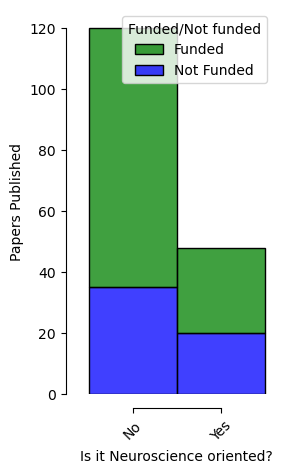

In [21]:
df1['Is it Neuroscience oriented?'] = df1['Is it Neuroscience oriented?'].replace({1: 'Yes', 0: 'No'})
df1['Is it Neuroscience oriented?']= df1['Is it Neuroscience oriented?'].apply(str)
sns.histplot(x="Is it Neuroscience oriented?",
             hue="Funded/Not funded", palette=["g","b"], multiple="stack",
            data=df1),
sns.despine(offset=10, trim=True)
plt.xticks(rotation=45)
fig = plt.gcf()
plt.ylabel('Papers Published')
fig.set_size_inches(2.5, 5)
plt.savefig('Neuro_Fund.JPG', bbox_inches = 'tight', dpi=300)

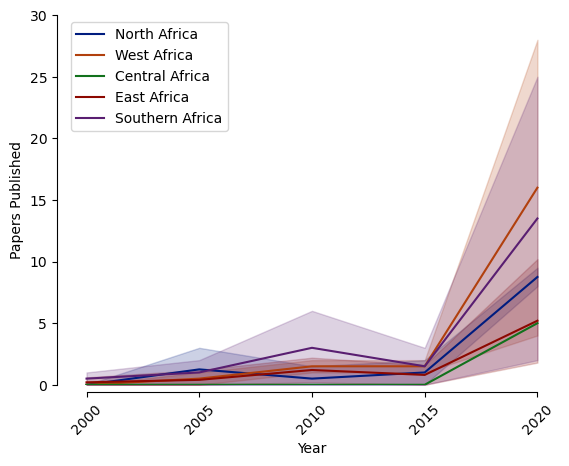

In [23]:
df2 = pd.read_csv('T_S_N.csv')
df2['Year']=df2['Year'].apply(str)
df2_2 = pd.read_csv('TS_2.csv')
df2_2['Year']=df2_2['Year'].apply(str)
plt.ylim(0, 30)
sns.lineplot(x='Year', y='Number', hue='Region',
palette="dark",markers=True,dashes=False, data=df2)
sns.despine(offset=5, trim=True)
plt.xticks(rotation=45)
plt.ylabel('Papers Published')
plt.legend(loc = 'upper left')
fig.set_size_inches(8, 5)
plt.savefig('Fig 1b.JPG', dpi=300)

In [ ]:
df1['Funded/Not funded'] = df1['Funded/Not funded'].replace({1: 'Funded', 0: 'Not Funded'})
df1['Funded/Not funded']= df1['Funded/Not funded'].apply(str)

sns.set_theme(style="ticks", palette="dark")

sns.histplot(x="Funded/Not funded",
            data=df1)
sns.despine(offset=10, trim=False)
plt.ylim(0, 120)
plt.xlabel('Funding Status')
plt.ylabel('Number of Articles')
plt.xticks(rotation=25)
fig = plt.gcf()
fig.set_size_inches(2, 5.2)
fig.savefig('NEWFunding_Status.JPG',  bbox_inches = 'tight', dpi=300)

In [26]:
fund = pd.crosstab(index=df1['Funded/Not funded'], columns='counts')
fund['percent'] = (fund['counts'] / fund['counts'].sum()) * 100
fund

col_0,counts,percent
Funded/Not funded,,
Funded,113,67.261905
Not Funded,55,32.738095


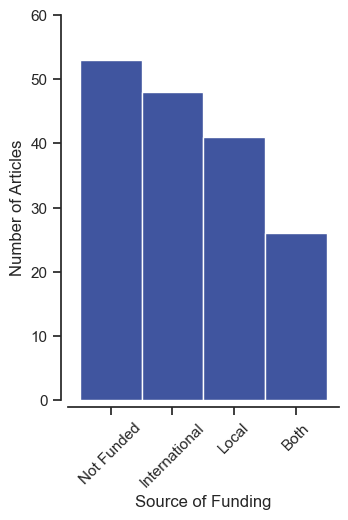

In [32]:
df1['Funding'] = df1['Funding'].replace({0: 'Not Funded', 1: 'Local', 2: 'International', 3: 'Both'})
df1['Funding']=df1['Funding'].apply(str)
df1["Funding"] = pd.Categorical(df1["Funding"],["Not Funded",
"International",
"Local",
"Both",
])
import seaborn as sns
sns.set_theme(style="ticks", palette="dark")
sns.histplot(x="Funding",
            data=df1)
sns.despine(offset=5, trim=False)
plt.xticks(rotation=45)
plt.ylabel('Number of Articles')
plt.ylim(0, 60)
fig = plt.gcf()
plt.xlabel('Source of Funding')
fig.set_size_inches(3.5, 5)
plt.savefig('Fig 3A.JPG', bbox_inches = 'tight', dpi=300)

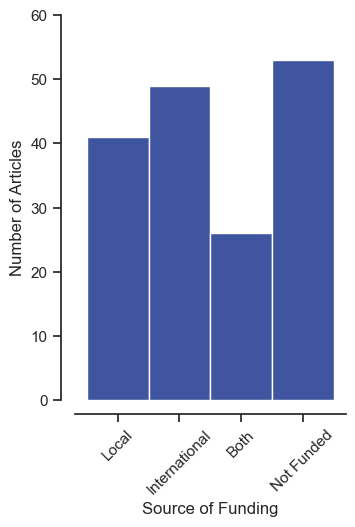

In [31]:
df5 = pd.read_csv('DROS.csv', encoding='latin-1')
df5['Fund'] = df5['Fund'].replace({0: 'Not Funded', 1: 'Local', 2: 'International', 3: 'Both'})
df5['Fund']=df5['Fund'].apply(str)
import seaborn as sns
sns.set_theme(style="ticks", palette="dark")
sns.histplot(x="Fund",
            data=df5)
sns.set_theme(style="ticks", palette="dark")
sns.despine(offset=10, trim=False)
fig = plt.gcf()
fig.set_size_inches(3.5, 5)
plt.xticks(rotation=45)
plt.ylabel('Number of Articles')
plt.ylim(0, 60)
fig = plt.gcf()
plt.xlabel('Source of Funding')
fig.set_size_inches(3.5, 5)
plt.savefig('NEWHist_papers_published_Funding.png', bbox_inches = 'tight', dpi=300)

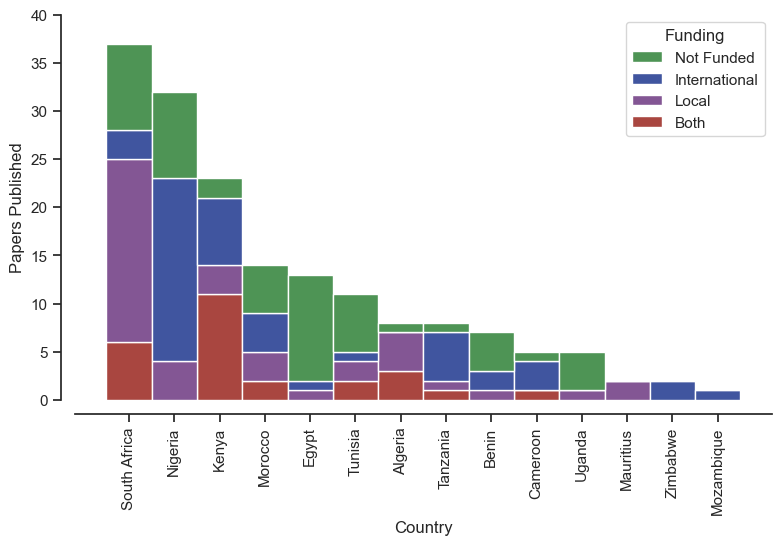

In [33]:
sns.histplot(x="Country",
             hue="Funding", palette=["g","b","m","r"], multiple="stack",
            data=df1),
sns.despine(offset=10, trim=False)
plt.xticks(rotation=90)
plt.ylabel('Papers Published')
plt.ylim(0, 40)
fig = plt.gcf()
fig.set_size_inches(9, 5)
plt.savefig('Fig 3B.JPG', bbox_inches = 'tight', dpi=300)

In [34]:
fund2 = pd.crosstab(index=df1['Funding'], columns='counts')
fund2['percent'] = (fund2['counts'] / fund2['counts'].sum()) * 100
fund2

col_0,counts,percent
Funding,,
Not Funded,53,31.547619
International,48,28.571429
Local,41,24.404762
Both,26,15.476190


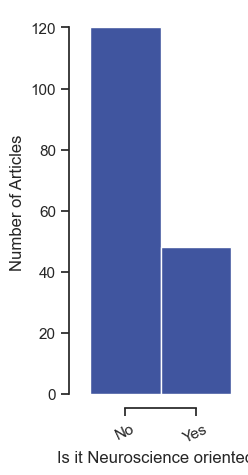

In [35]:
df1['Is it Neuroscience oriented?'] = df1['Is it Neuroscience oriented?'].replace({1: 'Yes', 0: 'No'})
df1['Is it Neuroscience oriented?']= df1['Is it Neuroscience oriented?'].apply(str)

sns.set_theme(style="ticks", palette="dark")

sns.histplot(x="Is it Neuroscience oriented?",
            data=df1)
sns.despine(offset=10, trim=True)
plt.xlabel('Is it Neuroscience oriented?')
plt.ylabel('Number of Articles')
plt.xticks(rotation=25)
fig = plt.gcf()
fig.set_size_inches(2, 5)
fig.savefig('Fig 2c.JPG',  bbox_inches = 'tight', dpi=300)

In [36]:
Count3 = pd.crosstab(index=df1['Is it Neuroscience oriented?'], columns='counts')
Count3['percent'] = (Count3['counts'] / Count3['counts'].sum()) * 100
Count3

col_0,counts,percent
Is it Neuroscience oriented?,,
No,120,71.428571
Yes,48,28.571429


In [ ]:
Both	7	4.166667
External Only	61	36.309524
Internal Only	13	7.738095
None	

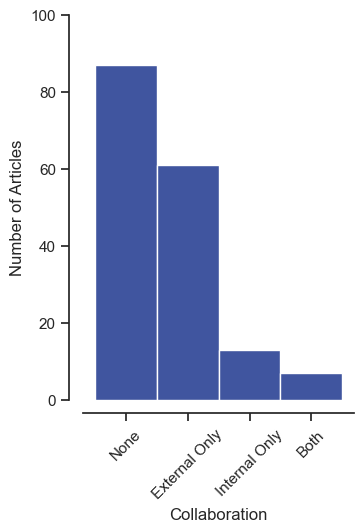

In [37]:
df1['IEC'] = df1['IEC'].replace({0: 'None', 1: 'External Only', 2: 'Internal Only', 3: 'Both'})
df1['IEC']=df1['IEC'].apply(str)
df1["IEC"] = pd.Categorical(df1["IEC"],["None",
"External Only",
"Internal Only",
"Both",
])
import seaborn as sns
sns.set_theme(style="ticks", palette="dark")
sns.histplot(x="IEC",
            data=df1)
sns.despine(offset=10, trim=False)
plt.xticks(rotation=45)
plt.ylabel('Number of Articles')
plt.ylim(0, 100)
fig = plt.gcf()
plt.xlabel('Collaboration')
fig.set_size_inches(3.5, 5)
plt.savefig('Fig 4a.JPG', bbox_inches = 'tight', dpi=300)

In [38]:
Count4 = pd.crosstab(index=df1['IEC'], columns='counts')
Count4['percent'] = (Count4['counts'] / Count4['counts'].sum()) * 100
Count4

col_0,counts,percent
IEC,,
None,87,51.785714
External Only,61,36.309524
Internal Only,13,7.738095
Both,7,4.166667


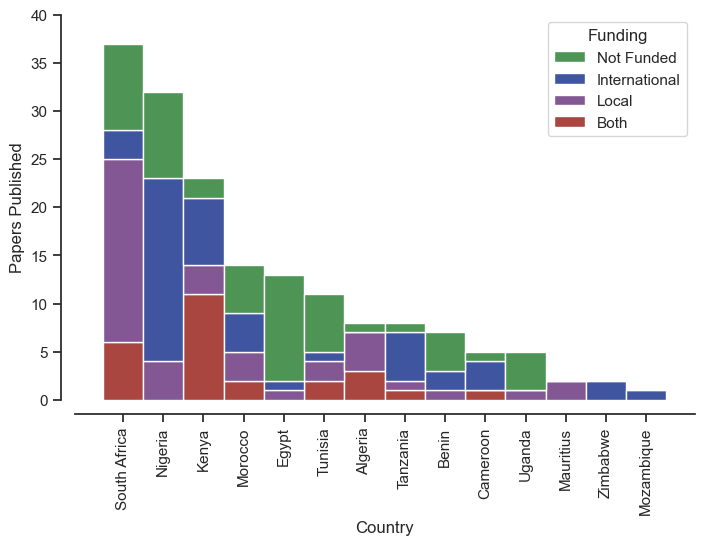

In [40]:
sns.histplot(x="Country",
             hue="Funding", palette=["g","b","m","r"], multiple="stack",
            data=df1),
sns.despine(offset=10, trim=False)
plt.xticks(rotation=90)
plt.ylabel('Papers Published')
plt.ylim(0, 40)
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.savefig('Fig 3B.JPG', bbox_inches = 'tight', dpi=300)

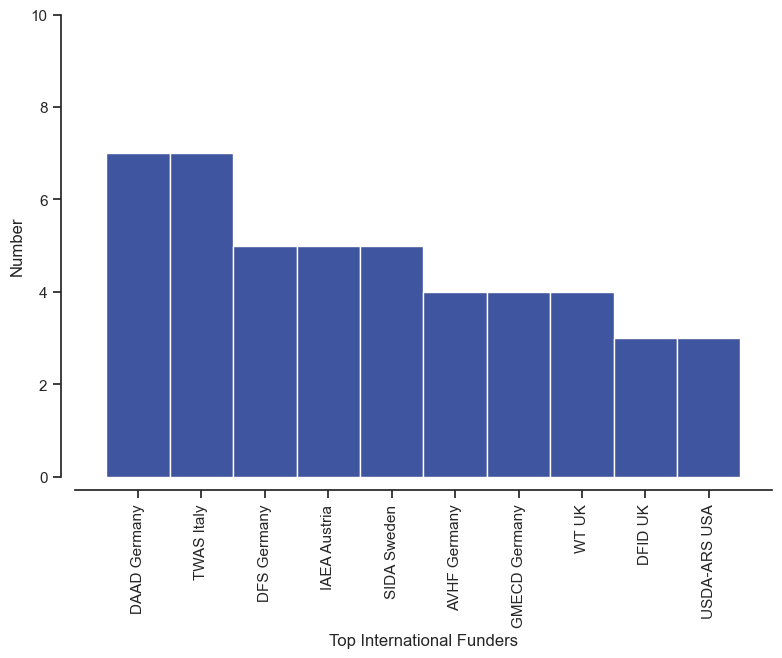

In [41]:
df3_1 = pd.read_csv('IF_1.csv',encoding='latin-1')
df3_1["Top International Funders"] = pd.Categorical(df3_1["Top International Funders"],["DAAD Germany",
"TWAS Italy",
"DFS Germany",
"IAEA Austria",
"SIDA Sweden",
"AVHF Germany",
"GMECD Germany",
"WT UK",
"DFID UK",
"USDA-ARS USA"
])
sns.set_theme(style="ticks", palette="dark")
sns.histplot(x="Top International Funders",
            data=df3_1)
sns.despine(offset=10, trim=False)
plt.xticks(rotation=90)
plt.ylim(0, 10)
plt.ylabel('Number')
fig = plt.gcf()
fig.set_size_inches(9, 6)
plt.savefig('Fig 3c.JPG', bbox_inches = 'tight', dpi=300)

In [44]:
Count5 = pd.crosstab(index=df3_1['Top International Funders'], columns='counts')
Count5['percent'] = (Count5['counts'] / Count5['counts'].sum()) * 100
Count5

col_0,counts,percent
Top International Funders,,
DAAD Germany,7,14.893617
TWAS Italy,7,14.893617
DFS Germany,5,10.638298
IAEA Austria,5,10.638298
SIDA Sweden,5,10.638298
AVHF Germany,4,8.510638
GMECD Germany,4,8.510638
WT UK,4,8.510638
DFID UK,3,6.382979


In [39]:
Count5.to_csv('fund__.csv', index=True)

In [ ]:
"DAAD Germany",
"TWAS Italy",
"DFS Germany",
"IAEA Austria",
"SIDA Sweden",
"AVHF Germany",
"GMECD Germany",
"WT UK",
"DFID UK",
"USDA-ARS USA",
"BDC Belgium",
"CAARF UK",
"CAPES Brazil",
"FAPERGS Portugal",
"IDEEV France",
"IFAD Italy",
"MFA Finland",
"MWRB Belgium",
"PRANAROM IC Belgium"

In [46]:
Count6.to_csv('fundc__.csv', index=True)

In [46]:
df3_1.head()

,International Funder_Full,International Funders,International Funder_COUNTRY,Top International Funders
0,Alexander von Humboldt Foundation,AVHF,Germany,AVHF Germany
1,Alexander von Humboldt Foundation,AVHF,Germany,AVHF Germany
2,Alexander von Humboldt Foundation,AVHF,Germany,AVHF Germany
3,Alexander von Humboldt Foundation,AVHF,Germany,AVHF Germany
4,Belgium development cooperation,BDC,Belgium,NaN


In [44]:
Count6 = pd.crosstab(index=df3['International Funder_COUNTRY'], columns='counts')
Count6['percent'] = (Count6['counts'] / Count6['counts'].sum()) * 100
Count6

col_0,counts,percent
International Funder_COUNTRY,,
Austria,5,7.692308
Belgium,6,9.230769
Brazil,2,3.076923
Finland,2,3.076923
France,2,3.076923
Germany,20,30.769231
Italy,9,13.846154
Portugal,2,3.076923
Sweden,5,7.692308


C:\Users\user\.conda\envs\stat\lib\site-packages\pandas\core\dtypes\cast.py:127: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
C:\Users\user\.conda\envs\stat\lib\site-packages\pandas\core\dtypes\cast.py:127: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
C:\Users\user\.conda\envs\stat\lib\site-packages\geoplot\geoplot.py:1427: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return shapely.geometry.LineString(geom)
C:\Users\user\.conda\envs\stat\lib\site-packages\shapely\geometry\linestring.py:47: ShapelyDeprecationWarning: The array interface is deprecated and will no longe

AttributeError: 'GeoAxesSubplot' object has no attribute 'outline_patch'

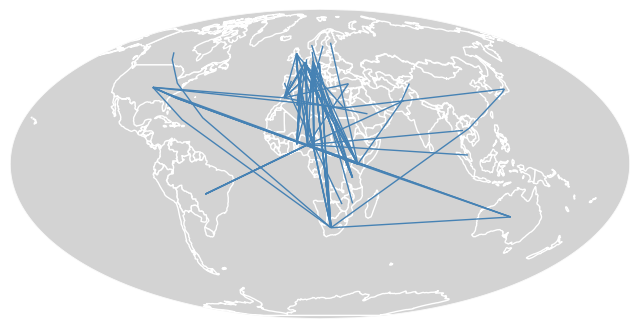

In [56]:
df6 = pd.read_csv('INT_COLAB.csv',encoding='latin-1')
gdf6 = gpd.GeoDataFrame(df6, geometry=gpd.points_from_xy(df6.Longitude1, df6.Latitude1))
gdf6['geom2'] = [Point(x, y) for x, y in zip(df6.Longitude2, df6.Latitude2)]
gdf6['multi'] = [MultiPoint([x, y]) for x, y in zip(gdf6.geometry, gdf6.geom2)]
cleaned_gdf6 = gdf6.set_geometry('multi').drop(['geometry', 'geom2'], axis=1)
cleaned_gdf6.head()
world = gpd.read_file(gplt.datasets.get_path('world'))

ax = gplt.sankey(cleaned_gdf6, projection=gcrs.Mollweide())
gplt.polyplot(world, ax=ax, facecolor='lightgray', edgecolor='white')
ax.set_global(); ax.outline_patch.set_visible(True)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.savefig('Fig 4D.JPG', bbox_inches = 'tight', dpi=300)

In [50]:
df6 = pd.read_csv('INT_COLAB.csv',encoding='latin-1')

In [51]:
Count7 = pd.crosstab(index=df6['Country of external collaboration 1'], columns='counts')
Count7['percent'] = (Count7['counts'] / Count7['counts'].sum()) * 100
Count7

col_0,counts,percent
Country of external collaboration 1,,
Australia,4,4.597701
Belgium,10,11.494253
Brazil,5,5.747126
Canada,1,1.149425
Czech Republic,3,3.448276
Denmark,1,1.149425
Finland,1,1.149425
France,11,12.643678
Germany,16,18.390805


In [76]:
Count7.to_csv('conlc__.csv', index=True)

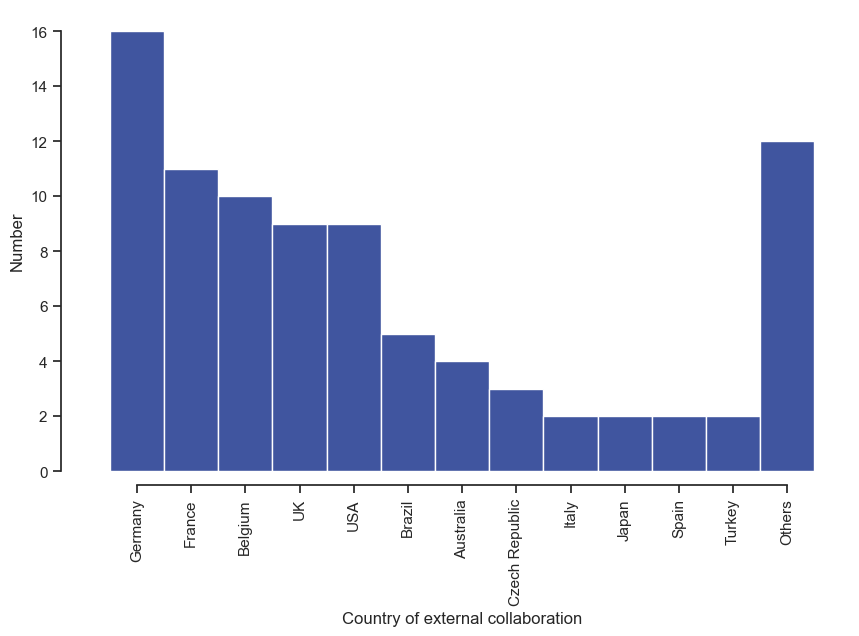

In [57]:
df6["Country of external collaboration"] = pd.Categorical(df6["Country of external collaboration"],["Germany",
"France",
"Belgium",
"UK",
"USA",
"Brazil",
"Australia",
"Czech Republic",
"Italy",
"Japan",
"Spain",
"Turkey",
"Others"])
sns.set_theme(style="ticks", palette="dark")
sns.histplot(x="Country of external collaboration",
            data=df6)
sns.despine(offset=10, trim=True)
plt.xticks(rotation=90)
plt.ylabel('Number')
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.savefig('Fig 4B.JPG', bbox_inches = 'tight', dpi=300)

In [37]:
Count8 = pd.crosstab(index=df6['Continent'], columns='counts')
Count8['percent'] = (Count8['counts'] / Count8['counts'].sum()) * 100
Count8

col_0,counts,percent
Continent,,
Asia,6,6.896552
Europe,62,71.264368
North America,10,11.494253
Oceanea,4,4.597701
South America,5,5.747126


C:\Users\user\.conda\envs\stat\lib\site-packages\pandas\core\dtypes\cast.py:127: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
C:\Users\user\.conda\envs\stat\lib\site-packages\pandas\core\dtypes\cast.py:127: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
C:\Users\user\.conda\envs\stat\lib\site-packages\geoplot\geoplot.py:1427: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return shapely.geometry.LineString(geom)
C:\Users\user\.conda\envs\stat\lib\site-packages\shapely\geometry\linestring.py:47: ShapelyDeprecationWarning: The array interface is deprecated and will no longe

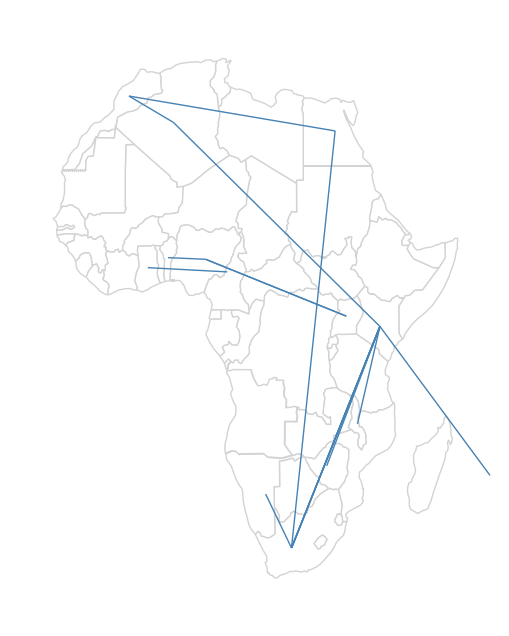

In [54]:
df4 = pd.read_csv('Afri_Colab.csv',encoding='latin-1')
gdf4 = gpd.GeoDataFrame(df4, geometry=gpd.points_from_xy(df4.Longitude1, df4.Latitude1))
gdf4['geom2'] = [Point(x, y) for x, y in zip(df4.Longitude2, df4.Latitude2)]
gdf4['multi'] = [MultiPoint([x, y]) for x, y in zip(gdf4.geometry, gdf4.geom2)]
cleaned_gdf4 = gdf4.set_geometry('multi').drop(['geometry', 'geom2'], axis=1)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
Africa = (world[world['continent'] ==  'Africa'])

ax = gplt.sankey(cleaned_gdf4, projection=gcrs.Mollweide())
gplt.polyplot(Africa, ax=ax, facecolor='white', edgecolor='lightgray')
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.savefig('Fig 4C.JPG', bbox_inches = 'tight', dpi=300)

In [ ]:
df4_1 = pd.read_csv('fund_bar_1.csv', encoding='latin-1')
df4_1["Top Local Funders"] = pd.Categorical(df4_1["Top Local Funders"],["NRF South Africa",
"ICIPE Kenya",
"NFSR Algeria",
"IFAD Kenya",
"KG Kenya",
"MHESR, Algeria",
"TMHESR Tunisia",
])
sns.set_theme(style="ticks", palette="dark")
sns.histplot(x="Top Local Funders",
            data=df4_1)
sns.despine(offset=10, trim=False)
plt.ylim(0, 20)
plt.xticks(rotation=90)
plt.ylabel('Number')
fig = plt.gcf()
fig.set_size_inches(5, 6)
plt.savefig('Fig 3D.JPG', bbox_inches = 'tight', dpi=300)

In [59]:
df9 = pd.read_csv('FND.csv', encoding='latin-1')
df9_1 = df9.pivot("Institution", "Funder", "Number")

C:\Users\user\AppData\Local\Temp\ipykernel_13052\69026121.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df9_1 = df9.pivot("Institution", "Funder", "Number")


In [ ]:
fmt="d","BMU Annaba, Algeria","FUT Akure, Nigeria","ICIPE Nairobi, Kenya","IITA Cotonou, Benin","NWU South Africa","SU, South Africa","SUA Tanzania","UI, Nigeria","UP South Africa","UT El Manar, Tunisia","Others"

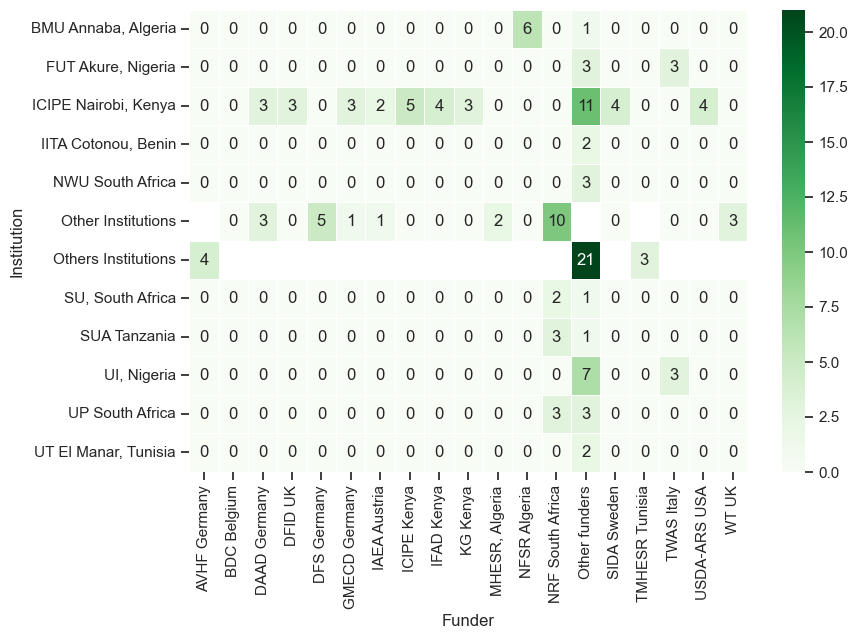

In [60]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df9_1, annot=True, linewidths=.5, cmap='Greens', ax=ax)
fig = plt.gcf()
plt.savefig('Fig 3E.JPG', bbox_inches = 'tight', dpi=300)